<a href="https://colab.research.google.com/github/AcacioMarcos/mackenzie/blob/main/Atividade_Aprofundamento_Trilha_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Atividade de aprofundamento da trilha 1

Neste item inicialmente realizei a conversão de uma publicação da Revista Mexicana de Investigación Educativa, publicada em 2013 que versa sobre o foco de uma política baseada em evidência.

Originalmente esse material estava em .pdf e, para melhor adequar ao proposto, realizei a conversão para .txt utilizando o aplicativo: https://convertio.co/pt/

O material gerado foi carregado para uma pasta do Google Drive e pode ser acessada pelo link: https://drive.google.com/file/d/1A2FwjQOtikz_G1gPn4D5IykYUNalyiH9/view?usp=sharing

A escolha por esse material se deu pois eu estava pesquisando sobre como que se pode melhorar a orientação das políticas públicas quando se tem um balizador em dados para sua concepção/desenvolvimento/implementação/avaliação.

Esse material indica como que esse processo foi pesquisado no México alterando o paradigma de orientação de políticas públicas para educação para a vertente de dados.

#### Aquisição dos Dados

Neste tópico irei utilizar o modelo de carga por arquivos locais. Assim sendo, esse material anteriormente citado foi carregado para o drive local.

In [6]:
import urllib.request  

carga = []

#for line in urllib.request.urlopen(r'https://drive.google.com/file/d/1A2FwjQOtikz_G1gPn4D5IykYUNalyiH9/view?usp=sharing'): 
#    carga.append(line.decode('utf-8'))

f = open('/Atividade_Trilha_1.txt','r')    # para arquivos locais
for line in f:
  carga.append(line)

for i in range(len(carga)):
    carga[i] = carga[i].lower() # para unicidade
    carga[i] = carga[i].replace('\n','')
    carga[i] = carga[i].replace('.','')
    carga[i] = carga[i].replace(',','')
    carga[i] = carga[i].replace('(','')
    carga[i] = carga[i].replace(')','')
    carga[i] = carga[i].replace('?','')
    carga[i] = carga[i].replace('\'','') # elimina ' e "

#### Iniciando um dicionario

A construção do dicionário em si seguiu o modelo anteriormente demonstrado pelo material

In [7]:
mydict = {}                             # crie um dicionário vazio

for line in carga:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict) 

{'rmie': 1, '2013': 1, 'vol': 6, '18': 1, 'núm': 5, '56': 1, 'pp': 10, '265-290': 1, 'issn:': 1, '14056666': 1, 'investigación': 89, 'el': 226, 'enfoque': 40, 'de': 725, 'la': 472, 'política': 59, 'basado': 21, 'en': 263, 'evidencia': 57, 'análisis': 26, 'su': 41, 'utilidad': 13, 'para': 119, 'educación': 40, 'méxico': 39, 'pedro': 2, 'flores-crespo': 19, 'resumen:': 1, 'este': 36, 'artículo': 4, 'discute': 1, 'metodología': 9, 'conocida': 1, 'como': 77, 'revisión': 19, 'sistemática': 13, 'systematic': 9, 'review': 6, 'que': 190, 'forma': 9, 'parte': 9, 'del': 91, 'corazón': 3, 'y': 279, 'práctica': 15, 'basada': 6, 'evidence-based': 7, 'policy': 15, 'and': 16, 'practice': 6, 'ebpp': 5, ';': 2, 'aunque': 5, 'toda': 5, 'meto-': 1, 'dología': 1, 'corte': 1, 'pragmático': 1, 'abre': 3, 'diversas': 2, 'controversias': 2, 'texto': 3, 'hace': 5, 'un': 71, 'repaso': 2, 'tales': 7, 'problemas': 7, 'así': 8, 'los': 165, 'méritos': 2, 'argumento': 3, 'central': 7, 'es': 87, 'tiende': 2, 'a': 99,

#### Resultados

Demonstração dos resultados obtidos na análise

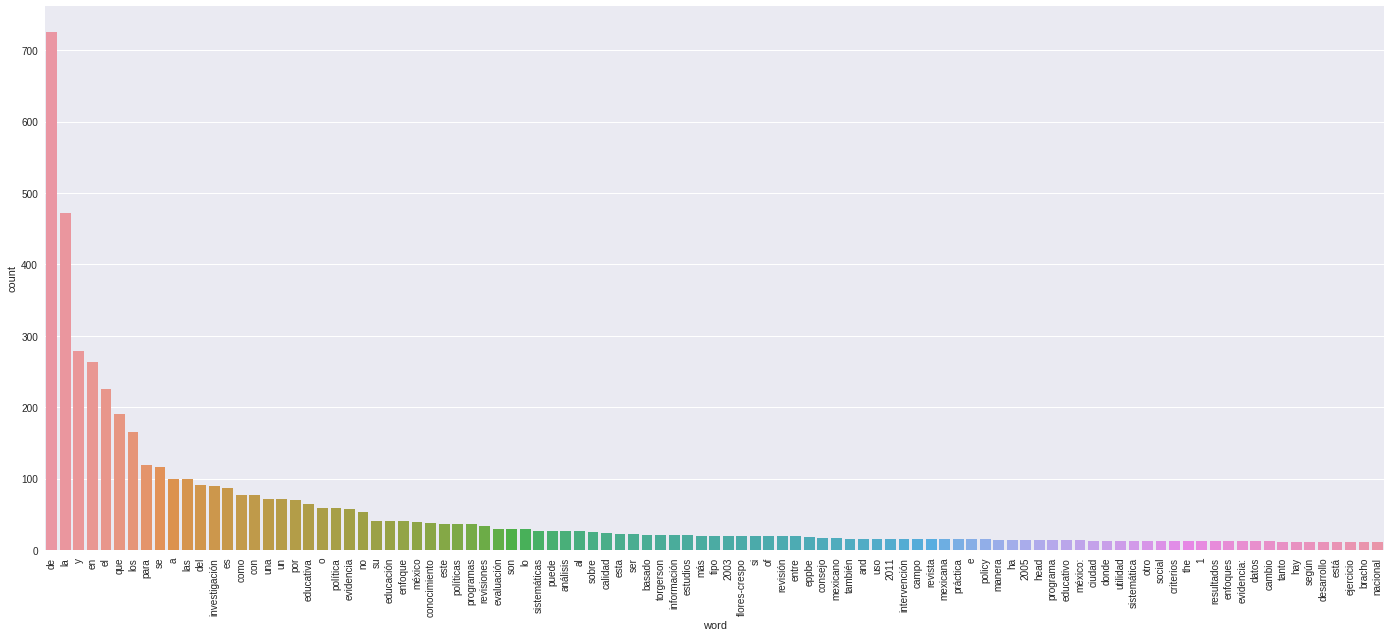

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 10] # somente termos com mais de 4 ocorrências
#df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

#### Conclusões

Seguindo o preconizado pela lei de Zipf, podemos verificar que as palavras que surgem mais de 10 vezes, removendo as ligações "de", "la", "y", "en" e congêneres as palavras que mais aparecem no texto são itens que realmente dizem respeito ao tema da publicação, tais como "investigación", "educativa/educación", "politica", "evidencia", "conocimiento", "mexico", "calidad", "analisis", dentre outras.